In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [21]:
np.random.seed(seed=2)
X = norm().rvs(size=100)

y = X - 2 * X ** 2 + norm().rvs(size=100)
X = X[:, np.newaxis]

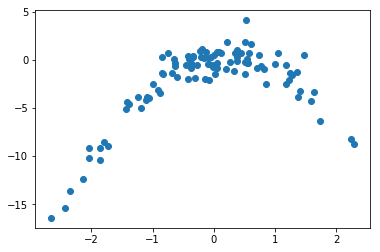

In [13]:
plt.scatter(X, y)

In [14]:
def make_model(degree):
    poly = PolynomialFeatures(degree)
    reg = LinearRegression(fit_intercept=False)
    return make_pipeline(poly, reg)

In [24]:
print("degree\tloccv")

for degree in range(1, 5):
    poly = make_model(degree)
    scores = cross_val_score(poly, X, y, cv=100, scoring='neg_mean_squared_error')
    loocv_error = sum(scores)/100
    print("%s\t%s" % (degree, loocv_error))

degree	loccv
1	-11.610208269693622
2	-1.2652839413336219


3	-1.2820418215169616
4	-1.3165915804276804


In [29]:
np.random.seed(seed=4)
X2 = norm().rvs(size=100)

y2 = X2 - 2 * X2 ** 2 + norm().rvs(size=100)
X2 = X2[:, np.newaxis]

print("degree\tloccv")

for degree in range(1, 5):
    poly = make_model(degree)
    scores = cross_val_score(poly, X2, y2, cv=100, scoring='neg_mean_squared_error')
    loocv_error = sum(scores)/100
    print("%s\t%s" % (degree, loocv_error))

degree	loccv
1	-9.529626915943641
2	-0.8835970575271189


3	-0.8958709087501779
4	-0.9056248631677509
